# Lecture 3: ⚙️ Feature Engineering


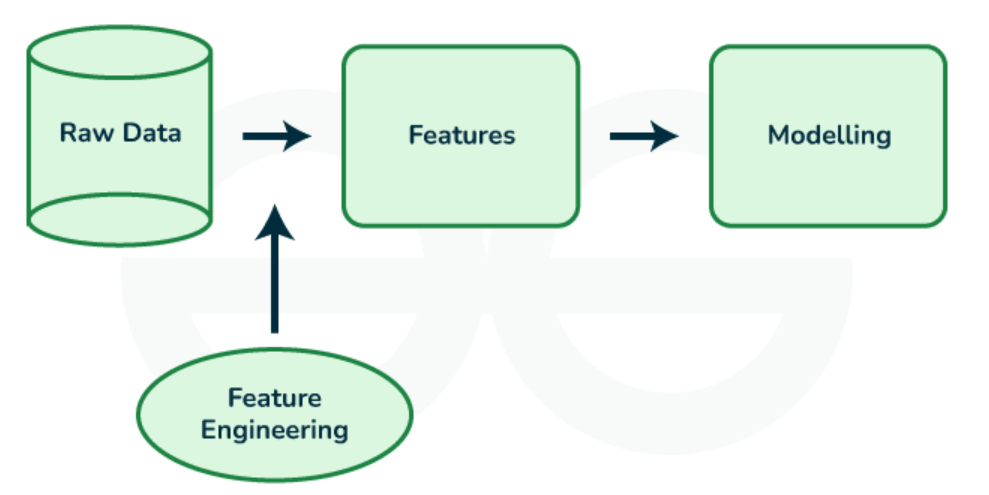

# 🤔 **Why Feature Engineering**

<font size="5">
    
* Raw data -> features -> simplified problem -> `easier for models to learn patterns and generalize better`.
* Allows to `incorporate Domain Knowledge`.
* Improve Model Performance and Robustness.

</font>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 🤓 **Simple Example**


<font size="5">
    
A bank wants to predict `whether a customer will default` on a loan based on their `financial and demographic data`.

</font>

In [1]:
import pandas as pd

data = {
    "Customer ID": [1, 2, 3],
    "Age": [25, 45, 35],
    "Income ($)": [50000, 80000, 60000],
    "Loan Amount ($)": [10000, 20000, 30000],
    "Loan Term (Months)": [24, 60, 36],
    "Credit Score": [700, 650, 620],
    "Loan Purpose": ["Education", "Home Renovation", "Medical"],
    "Last Late Payment (Days Ago)": [90, 400, 180],
    "Default (Target)": ["No", "Yes", "No"]
}


df = pd.DataFrame(data)

In [2]:
df.head()

,Customer ID,Age,Income ($),Loan Amount ($),Loan Term (Months),Credit Score,Loan Purpose,Last Late Payment (Days Ago),Default (Target)
0,1,25,50000,10000,24,700,Education,90,No
1,2,45,80000,20000,60,650,Home Renovation,400,Yes
2,3,35,60000,30000,36,620,Medical,180,No


# **What kind of features can we make here?**

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 1. Debt-to-Income Ratio (DTI): Measures how much of the person’s income goes towards paying off debt.

In [3]:
df["DTI"] = df["Loan Amount ($)"] / df["Income ($)"]


df[["Customer ID", "Income ($)", "Loan Amount ($)", "DTI"]].head()

,Customer ID,Income ($),Loan Amount ($),DTI
0,1,50000,10000,0.20
1,2,80000,20000,0.25
2,3,60000,30000,0.50


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 2. Instead of using Age as a continuous variable, we create Age Groups to capture patterns based on different life stages:

In [4]:
df["age_group"] = pd.cut(
    df["Age"], 
    bins=[0, 25, 35, 60], 
    labels=["young", "middle-aged", "senior"]
)

df[["Customer ID", "Age", "age_group"]].head()

,Customer ID,Age,age_group
0,1,25,young
1,2,45,senior
2,3,35,middle-aged


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 3. Days Since Last Late Payment: Instead of using the raw number of days, we convert it into a categorical feature:

In [5]:
df["risk_level"] = pd.cut(
    df["Last Late Payment (Days Ago)"], 
    bins=[0, 100, 200, 500],
    labels=["high risk", "medium risk", "low risk"]
)


df[["Customer ID", "Last Late Payment (Days Ago)", "risk_level"]].head()

,Customer ID,Last Late Payment (Days Ago),risk_level
0,1,90,high risk
1,2,400,low risk
2,3,180,medium risk


<br>
<br>
<br>
<br>
<br>
<br>

## These were some of the methods where we combined `Domain Knowledge` and `Basic Feature Transformation` methods to create valuable features.

<br>
<br>
<br>

## Let's look at the most commaon `Feature Transformation` methods for Feature Engineering
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 🧱 **Handling Categorical Features**

## Types of Categorical Features:


### 1. Nominal
* 2 or more categories and `no inherent order`.
* Examples - Names of citites

### 2. Ordinal
* 2 or more categories `with an inherent order`.
* Example - `low risk`, `medium risk`, `high risk`

### 3. Binary
* Just 2 categories - 0s and 1s.
* Example - A feature called `is_married` with just True/False values.

### 4. Cyclic
* Have an inherent order and also form a cycle.
* Example - A feature with day of the week.


<br>
<br>
<br>
<br>
<br>
<br>

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
df = pd.read_csv("../data/cat-in-the-dat.csv")

In [8]:
df.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


In [9]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

### 🔢 Ordinal Categorical Variables

In [10]:
for idx, val in enumerate(df["ord_2"].unique()):
    print("{}: {}".format(idx, val))

0: Hot
1: Warm
2: Freezing
3: Lava Hot
4: Cold
5: Boiling Hot
6: nan


### Can't pass text as input to an ML model. We have to convert these categories to numbers.

In [11]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df["ord_2_le"] = label_enc.fit_transform(df["ord_2"])

In [12]:
df[["ord_2", "ord_2_le"]].head(7)

,ord_2,ord_2_le
0,Hot,3
1,Warm,5
2,Freezing,2
3,Lava Hot,4
4,Cold,1
5,Hot,3
6,Cold,1


In [13]:
for encoded_label in sorted(df["ord_2_le"].unique().tolist()):
    print(encoded_label, "-", label_enc.inverse_transform([encoded_label])[0])

0 - Boiling Hot
1 - Cold
2 - Freezing
3 - Hot
4 - Lava Hot
5 - Warm
6 - nan


### We can use this directly in any `tree-based` model:
* Decision Trees
* Random Forests
* Tree based boosting models:
    * XGBoost
    * GBM
    * LightGBM



### But can we use them directly with Linear Models like Logistic Regression, SVMs?

<br>
<br>
<br>
<br>
<br>

### The order is not preserved if we use Label Encoding directly.
### Better to specify the order manually wherever possible.

In [14]:
ord_2_label_map = {
    "Freezing": 0,
    "Cold": 1,
    "Warm": 2,
    "Hot": 3,
    "Boiling Hot": 4,
    "Lava Hot": 5
}


df["ord_2_ordered_mapping"] = df["ord_2"].map(ord_2_label_map)


df[["ord_2", "ord_2_ordered_mapping"]].head(10)

,ord_2,ord_2_ordered_mapping
0,Hot,3.0
1,Warm,2.0
2,Freezing,0.0
3,Lava Hot,5.0
4,Cold,1.0
5,Hot,3.0
6,Cold,1.0
7,Cold,1.0
8,Boiling Hot,4.0
9,Lava Hot,5.0


In [15]:
df[df["ord_2"].isna()][["ord_2", "ord_2_ordered_mapping"]].head(10)

,ord_2,ord_2_ordered_mapping
69,NaN,NaN
186,NaN,NaN
226,NaN,NaN
229,NaN,NaN
276,NaN,NaN
281,NaN,NaN
290,NaN,NaN
307,NaN,NaN
310,NaN,NaN
315,NaN,NaN


# 🔡 **Nominal Categorical Variables**

In [16]:
print("Categories in nom_1:")
for idx, cat in enumerate(df["nom_1"].unique()):
    print(idx, "-", cat)

Categories in nom_1:
0 - Trapezoid
1 - Star
2 - nan
3 - Circle
4 - Triangle
5 - Polygon
6 - Square


In [17]:
print("Categories in nom_2:")
for idx, cat in enumerate(df["nom_2"].unique()):
    print(idx, "-", cat)

Categories in nom_2:
0 - Hamster
1 - Axolotl
2 - Lion
3 - Dog
4 - Cat
5 - Snake
6 - nan


### 1. You can `Label Encode` them when using tree based models like:

<font size=3>

* Decision Trees
* Random Forests
* Tree Based Boosting Models
    * GBM
    * XGBoost
    * LightGBM

</font>



### 2. You must `One-hot Encode` them when using linear models, SVM or Neural Networks

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
nom_1_ohe = ohe.fit_transform(df["nom_1"].values.reshape(-1, 1)).toarray()

In [19]:
nom_1_ohe_df = pd.DataFrame(nom_1_ohe, columns=["nom_1_" + str(cat) for cat in ohe.categories_[0]])

nom_1_ohe_df.head()

,nom_1_Circle,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_1_nan
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 🪫 **Handling Missing Values**

<br>
<br>
<br>

### 🚨 Note: It is always best to find the core reason behind missing values and use a customized solution for handling them. If that is not possible, following are some general purpose solutions.

<br>
<br>
<br>

### 1. Filling with Mode: The laziest option. Should be the last resort.

In [20]:
df["ord_1"].isna().value_counts()

False    581959
True      18041
Name: ord_1, dtype: int64

In [21]:
df["ord_1"].value_counts()

Novice         160597
Expert         139677
Contributor    109821
Grandmaster     95866
Master          75998
Name: ord_1, dtype: int64

In [22]:
df["ord_1_without_na"] = df["ord_1"].fillna(df["ord_1"].mode()[0])

In [23]:
df[df["ord_1"].isna()][["ord_1", "ord_1_without_na"]].head()

,ord_1,ord_1_without_na
2,NaN,Novice
187,NaN,Novice
195,NaN,Novice
211,NaN,Novice
276,NaN,Novice


<br>
<br>
<br>
<br>


### 2. 🔬 Create a new category - `MISSING` / `UNKNOWN`

#### ✨ One of the most common and impactful methods!

<font size=3>

* Keeps missing data distinct while still being interpretable
* Prevents information loss without making assumptions.
* Helpful when missing values might have meaning `(e.g., missing salary → unemployed)`
* Handles `unseen categories` during inference:
    * If the model encounters a category not seen during training, it may throw an error or fail to make a prediction.
    * By using `MISSING` / `UNKNOWN` during training, the model `learns to generalize to new categories` instead of breaking.


</font>

In [24]:
df["ord_1"].unique()

array(['Contributor', 'Grandmaster', nan, 'Novice', 'Expert', 'Master'],
      dtype=object)

In [25]:
df["ord_1_with_unknown_cat"] = df["ord_1"].fillna("UNKNOWN")

In [26]:
df["ord_1_with_unknown_cat"].unique()

array(['Contributor', 'Grandmaster', 'UNKNOWN', 'Novice', 'Expert',
       'Master'], dtype=object)

### ⛓️ 3. Fill with the Most Frequent Category Based on Another Feature (Conditional Imputation)



### ⚠ When to Avoid: If there is no strong correlation between features.



In [27]:
df["nom_5"].isna().value_counts()

False    582222
True      17778
Name: nom_5, dtype: int64

In [28]:
df["nom_5"].value_counts()

fc8fc7e56    977
360a16627    972
7917d446c    961
423976253    961
079b76328    960
            ... 
7335087fd      5
30019ce8a      3
0385d0739      1
b3ad70fcb      1
d6bb2181a      1
Name: nom_5, Length: 1220, dtype: int64

In [29]:
df.groupby("day")["nom_5"].apply(lambda x: x.mode()[0])

day
1.0    fe2d7e137
2.0    1925bf87e
3.0    124963b67
4.0    7cfaa2662
5.0    f4c4a7cc2
6.0    691ebeae8
7.0    360a16627
Name: nom_5, dtype: object

In [30]:
df["nom_5_fill_grouped_na"] = df.groupby("day")["nom_5"].transform(lambda x: x.mode()[0])

In [31]:
df[df["nom_5"].isna()][["nom_5", "nom_5_fill_grouped_na"]].head(10)

,nom_5,nom_5_fill_grouped_na
14,NaN,1925bf87e
19,NaN,691ebeae8
31,NaN,f4c4a7cc2
38,NaN,360a16627
58,NaN,691ebeae8
81,NaN,691ebeae8
83,NaN,7cfaa2662
128,NaN,f4c4a7cc2
130,NaN,691ebeae8
137,NaN,124963b67


# ✨ **Create New Features**

## 1. Add a feature with counts of each category

In [32]:
ord_1_freq = df["ord_5"].value_counts()

In [33]:
df["ord_5_frequency"] = df["ord_5"].map(ord_1_freq)


df[["ord_5", "ord_5_frequency"]].head(30)

,ord_5,ord_5_frequency
0,Pw,4568.0
1,pE,4293.0
2,eN,3090.0
3,NaN,NaN
4,OZ,4565.0
5,wa,4417.0
6,rg,4437.0
7,PS,5447.0
8,mX,1302.0
9,OZ,4565.0


### The count tells the model how common or rare a category is.

<font size=3>

* Categories that appear frequently may behave differently than rare ones.

    * 🔹 Example: In fraud detection, a frequently occurring merchant may be low risk, while a rare one may be high risk.
<br>

* Improves Generalization for Unseen Categories:

  * When a new, unseen category appears in test data, `One-Hot Encoding fails` because it wasn’t seen during training.
  * Count encoding generalizes better because it can `assign a frequency of 1` to unseen categories.

<br>

</font>

## 2. Create new categories based on frequency of categories in a feature

<font size=3>

We can use the new feature with the frequencies to create more fine-grained features and/or domain-specific features.

</font>

In [34]:
df["ord_5_is_rare"] = df["ord_5_frequency"] < 1000

df["ord_5_is_rare"].value_counts()

False    587134
True      12866
Name: ord_5_is_rare, dtype: int64

In [35]:
print(
    "{} out of {} categories in ord_5 are rare.".format(df[df["ord_5_is_rare"]]["ord_5"].nunique(), df["ord_5"].nunique())
)

df[df["ord_5_is_rare"]]["ord_5"].unique()

31 out of 190 categories in ord_5 are rare.


array(['tT', 'Dn', 'MX', 'BX', 'Yr', 'pl', 'NT', 'ur', 'XI', 'vw', 'HO',
       'wJ', 'WC', 'Yb', 'kP', 'fF', 'Qm', 'Cn', 'nf', 'Tg', 'uW', 'FB',
       'uI', 'MF', 'RB', 'SL', 'PG', 'vQ', 'eA', 'gV', 'Zv'], dtype=object)

### Note:
#### When Should You Use Category Count Encoding?
* ✅ When the categorical feature has many unique values (e.g., city names, product categories).
* ✅ When using tree-based models (like Random Forest, XGBoost).


<br>
<br>
<br>


## 3. Create a feature which acts as a "Missing Indicator"
   
<font size=3>
    
Just like creating a feature which says whether a category is rare or not, we can create a `feature which says whether the category is NULL or not`.

</font>

In [36]:
df["is_ord_3_na"] = df["ord_3"].isna()

In [37]:
df["is_ord_3_na"].value_counts()

False    582084
True      17916
Name: is_ord_3_na, dtype: int64

### Why is This Useful?

<font size=3>
    
* Instead of just filling missing values, we explicitly tell the model that data was missing.
* If the reason for missingness is related to the target variable (e.g., missing credit scores for high-risk customers), this feature helps capture that relationship.

</font>

<br>
<br>
<br>
<br>

# Creating N-degree Categorical Features

<font size=3>

* Combine 2 (or more categorical columns) by concating the categories.
* Instead of treating each category independently, we create a more specific feature.
* Helps tree based models identify better splits, capture interactions and train faster.

In [38]:
df["month"] = df["month"].fillna(df["month"].mode()[0]).astype(int)
df["nom_3"] = df["nom_3"].fillna(df["nom_3"].mode()[0])

df["month_and_nom_0"] = df["month"].astype(str) + "_" + df["nom_3"].astype(str)

df[["month_and_nom_0"]].head(10)

,month_and_nom_0
0,3_Russia
1,7_India
2,9_Canada
3,3_Finland
4,12_Costa Rica
5,4_China
6,6_Costa Rica
7,1_Finland
8,3_Russia
9,8_Finland


<br>
<br>
<br>
<br>

### Do the same at scale:

In [39]:
import itertools

cols_for_concatenation = ["nom_1", "nom_2", "nom_3", "nom_4"]
col_combinations = list(itertools.combinations(cols_for_concatenation, 2))

col_combinations

[('nom_1', 'nom_2'),
 ('nom_1', 'nom_3'),
 ('nom_1', 'nom_4'),
 ('nom_2', 'nom_3'),
 ('nom_2', 'nom_4'),
 ('nom_3', 'nom_4')]

In [40]:
deg2_cols = []

for col_a, col_b in col_combinations:
    new_col = "{}_{}".format(col_a, col_b)
    df[new_col] = df[col_a].astype(str) + "_" + df[col_b].astype(str)
    deg2_cols.append(new_col)

In [41]:
df[deg2_cols].head(10)

,nom_1_nom_2,nom_1_nom_3,nom_1_nom_4,nom_2_nom_3,nom_2_nom_4,nom_3_nom_4
0,Trapezoid_Hamster,Trapezoid_Russia,Trapezoid_Bassoon,Hamster_Russia,Hamster_Bassoon,Russia_Bassoon
1,Star_Axolotl,Star_India,Star_Theremin,Axolotl_India,Axolotl_Theremin,India_Theremin
2,nan_Hamster,nan_Canada,nan_Bassoon,Hamster_Canada,Hamster_Bassoon,Canada_Bassoon
3,Circle_Hamster,Circle_Finland,Circle_Theremin,Hamster_Finland,Hamster_Theremin,Finland_Theremin
4,Triangle_Hamster,Triangle_Costa Rica,Triangle_nan,Hamster_Costa Rica,Hamster_nan,Costa Rica_nan
5,Triangle_Lion,Triangle_China,Triangle_Bassoon,Lion_China,Lion_Bassoon,China_Bassoon
6,Triangle_Hamster,Triangle_Costa Rica,Triangle_Bassoon,Hamster_Costa Rica,Hamster_Bassoon,Costa Rica_Bassoon
7,Triangle_Axolotl,Triangle_Finland,Triangle_Bassoon,Axolotl_Finland,Axolotl_Bassoon,Finland_Bassoon
8,Polygon_Hamster,Polygon_Russia,Polygon_Oboe,Hamster_Russia,Hamster_Oboe,Russia_Oboe
9,Polygon_Hamster,Polygon_Finland,Polygon_Theremin,Hamster_Finland,Hamster_Theremin,Finland_Theremin


# #️⃣ Handling Numerical Features

<font size=5>

Except for tree based model, we must scale the numeric features for normalization.

</font>

In [42]:
import numpy as np

df = pd.read_csv("../data/tab_playground.csv")

replace_percentage = 0.3
n_replace = int(df.shape[0] * replace_percentage)

nan_indices = np.random.choice(df.index, n_replace, replace=False)
df.loc[nan_indices, 'carat'] = np.nan

In [43]:
df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [44]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df["x_scaled"] = std_scaler.fit_transform(df["x"].values.reshape(-1, 1))

df[["x", "x_scaled"]].head()

,x,x_scaled
0,7.27,1.401353
1,8.06,2.113437
2,5.69,-0.022816
3,4.38,-1.203614
4,7.65,1.743874


<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 🪫 Handling Missing Values

### 1. Mean/Median Imputation (lazies option, should be last resort)

In [45]:
df["carat"].isna().value_counts()

False    135502
True      58071
Name: carat, dtype: int64

In [46]:
df["carat_mean_imputed"] = df["carat"].fillna(df["carat"].mean())

In [47]:
df[df["carat"].isna()][["carat", "carat_mean_imputed"]].head()

,carat,carat_mean_imputed
10,NaN,0.791405
12,NaN,0.791405
15,NaN,0.791405
20,NaN,0.791405
22,NaN,0.791405


<br>
<br>
<br>
<br>
<br>

# 2. Fill with the Mean value Based on Another Feature (Conditional Imputation)

In [48]:
df.groupby("clarity")["carat"].mean()

clarity
I1      1.090567
IF      0.445386
SI1     0.856531
SI2     1.072864
VS1     0.713100
VS2     0.765334
VVS1    0.454664
VVS2    0.566824
Name: carat, dtype: float64

In [49]:
df["carat_with_clarity_mean"] = df["carat"].fillna(
    df.groupby("clarity")["carat"].transform("mean")    
)

In [50]:
df[df["carat"].isna()][["carat", "clarity", "carat_with_clarity_mean"]].head()

,carat,clarity,carat_with_clarity_mean
10,NaN,VS2,0.765334
12,NaN,SI1,0.856531
15,NaN,VS2,0.765334
20,NaN,VS1,0.713100
22,NaN,VS2,0.765334


In [51]:
df.groupby(["clarity", "cut"])["carat"].mean()

clarity  cut      
I1       Fair         1.136098
         Good         1.200000
         Ideal        0.972718
         Premium      1.119512
         Very Good    1.138636
IF       Fair         0.460000
         Good         0.710238
         Ideal        0.416705
         Premium      0.548199
         Very Good    0.539540
SI1      Fair         0.985844
         Good         0.862557
         Ideal        0.786773
         Premium      0.931313
         Very Good    0.879542
SI2      Fair         1.152195
         Good         1.042058
         Ideal        1.006056
         Premium      1.150313
         Very Good    1.062555
VS1      Fair         0.912031
         Good         0.788713
         Ideal        0.659243
         Premium      0.794600
         Very Good    0.742562
VS2      Fair         0.969891
         Good         0.854600
         Ideal        0.678635
         Premium      0.865501
         Very Good    0.826678
VVS1     Fair         0.616429
         Good       

In [52]:
df["carat_with_clarity_cut_mean"] = df["carat"].fillna(
    df.groupby(["clarity", "cut"])["carat"].transform("mean")    
)

In [53]:
df[df["carat"].isna()][["carat", "clarity", "cut", "carat_with_clarity_cut_mean"]].head(10)

,carat,clarity,cut,carat_with_clarity_cut_mean
10,NaN,VS2,Very Good,0.826678
12,NaN,SI1,Good,0.862557
15,NaN,VS2,Premium,0.865501
20,NaN,VS1,Ideal,0.659243
22,NaN,VS2,Ideal,0.678635
24,NaN,SI1,Ideal,0.786773
27,NaN,VS1,Ideal,0.659243
31,NaN,SI1,Fair,0.985844
36,NaN,VVS2,Very Good,0.554110
37,NaN,VS2,Ideal,0.678635


# 📐 Create Linear Features

<font size=4>

Linear features in numerical feature engineering are created using operations like `interaction terms, polynomial terms, feature sums, or averages` to capture the relationships between features and improve model performance.

</font>

`Interaction terms` are created by `multiplying` or more features together, capturing the combined effect of those features.

In [54]:
std_scaler = StandardScaler()
df[["carat_with_clarity_cut_mean", "depth"]] = std_scaler.fit_transform(df[["carat_with_clarity_cut_mean", "depth"]])

In [55]:
df["carat_with_clarity_cut_mean_interaction_depth"] = df["carat_with_clarity_cut_mean"] * df["depth"]

`Polynomial features` capture `non-linear relationships` by raising a feature to a power (like squaring or cubing).

In [56]:
df["carat_with_clarity_cut_mean_squared"] = df["carat_with_clarity_cut_mean"] ** 2

The `sum of multiple features` can capture their `combined effect as a linear feature`.

In [57]:
df["carat_with_clarity_cut_mean_plus_depth"] = df["carat_with_clarity_cut_mean"] + df["depth"]

<br>
<br>
<br>
<br>
<br>



# ⚡️ Polynomial Features at scale

In [58]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

std_scaler = StandardScaler()
scaled_feats = std_scaler.fit_transform(df[["carat_with_clarity_cut_mean", "depth"]])

poly_feat_creator = PolynomialFeatures(degree=2, include_bias=False)

poly_feat = poly_feat_creator.fit_transform(scaled_feats)

In [59]:
pd.DataFrame(scaled_feats, columns=["a", "b"]).head()

,a,b
0,1.821380,0.350768
1,3.096034,0.165874
2,-0.228063,-0.573702
3,-1.177805,-0.203914
4,2.271258,0.720555


In [60]:
pd.DataFrame(poly_feat, columns=["a", "b", "a^2", "ab", "b^2"]).head()

,a,b,a^2,ab,b^2
0,1.821380,0.350768,3.317427,0.638881,0.123038
1,3.096034,0.165874,9.585428,0.513551,0.027514
2,-0.228063,-0.573702,0.052013,0.130840,0.329134
3,-1.177805,-0.203914,1.387225,0.240171,0.041581
4,2.271258,0.720555,5.158614,1.636567,0.519200


# 🕹️ Create domain specific categories / bins from numeric columns

In [61]:
df["carat"].describe()

count    135502.000000
mean          0.791405
std           0.463630
min           0.200000
25%           0.400000
50%           0.700000
75%           1.030000
max           3.500000
Name: carat, dtype: float64

In [62]:
df["is_carat_low"] = df["carat"] < 0.5

df["is_carat_low"].value_counts()

False    148965
True      44608
Name: is_carat_low, dtype: int64

In [63]:
num_bins = int(np.floor(np.log2(df.shape[0]) + 1))

df["carat_categories"] = pd.cut(df["carat"], num_bins, labels=False)

In [64]:
df["carat_categories"].value_counts()

0.0     32678
1.0     26431
4.0     22188
2.0     17557
3.0      9734
5.0      9432
7.0      9342
9.0      3021
10.0     1920
6.0      1388
8.0      1255
11.0      434
12.0      100
13.0       11
15.0       10
17.0        1
Name: carat_categories, dtype: int64

# 🪵 Log Transformation

<font size=3>

* Log transformation is particularly useful when dealing with `highly skewed data`.
* Log transformation helps to `stabilize the variance` of the data:
    * Data with a wide range (from small to large numbers) often have `heteroscedasticity`, meaning the variance of the feature changes as the value of the feature changes.
    * Taking the log of such a feature makes the variance more constant across the range of values, improving the model’s stability.
* Log transformation reduces the influence of outliers.
* Log transformation often helps models converge more quickly.
* Makes the data `symmetric`, which can improve the performance of models that assume linearity (like Logistic Regression)

</font>


### 🚨 Note: You should apply log transformation for the target variable as well if it is skewed.

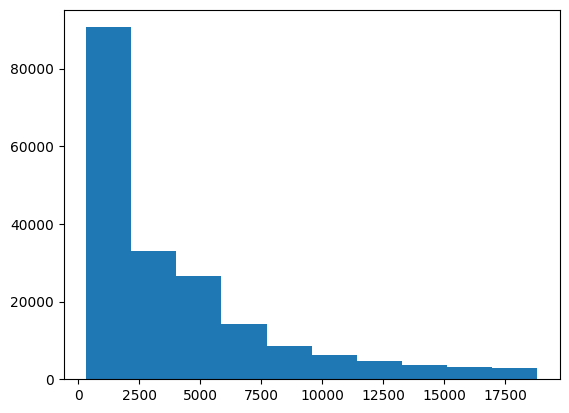

In [65]:
import matplotlib.pyplot as plt

plt.hist(df["price"]);

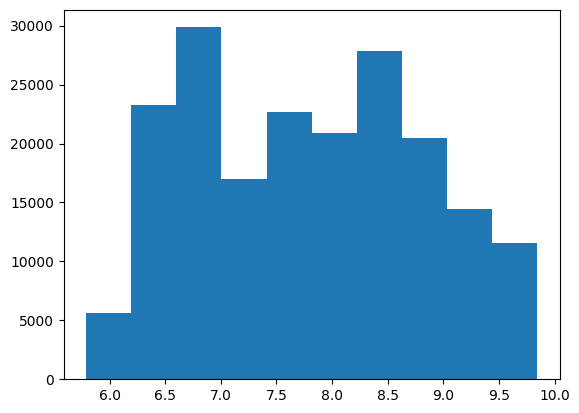

In [66]:
plt.hist(np.log1p(df["price"]));

### 🤷‍♂️ What to do in case we have negative values in our numeric feature?

In [67]:
np.log1p(-1)

-inf

In [68]:
np.log1p(-10)

nan

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### 🤓 We can shift the range of the original values to make all values positive and then apply log.

In [69]:
num_feature = np.array([-1, -0.5, -0.4, -0.3, -0.35, 0, 1, 1.5, 10, 100, 120, 140, 220,])

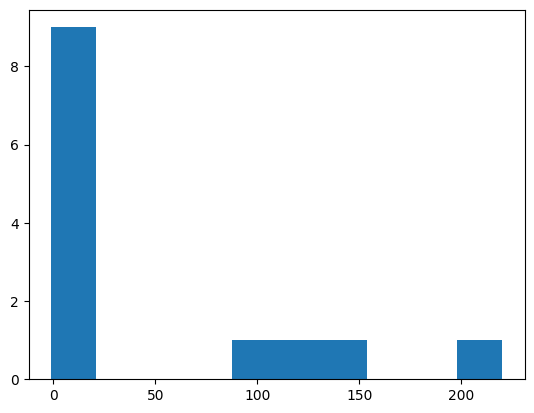

In [70]:
plt.hist(num_feature);

In [71]:
adjusted_num_feature = num_feature - np.min(num_feature)

In [72]:
adjusted_num_feature_log = np.log1p(adjusted_num_feature)

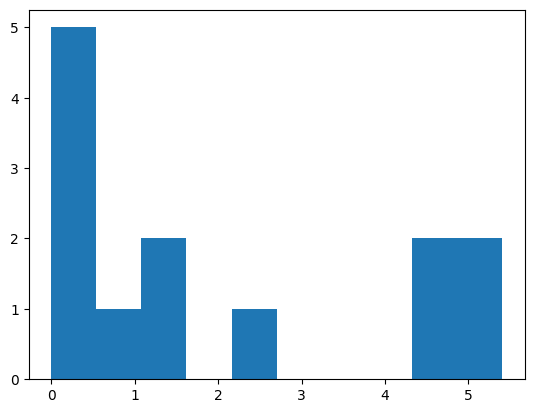

In [73]:
plt.hist(adjusted_num_feature_log);

# Can we combine a categorical feature and a numerical feature to create a new feature?

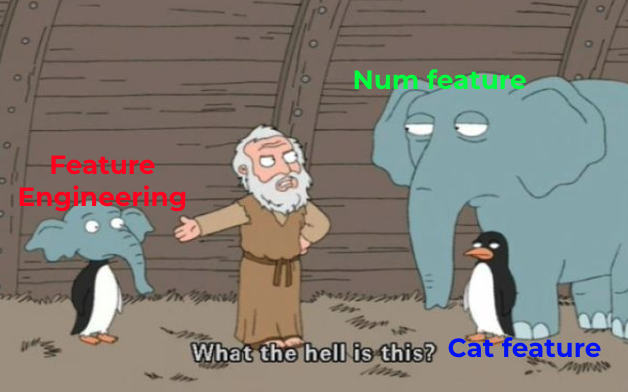
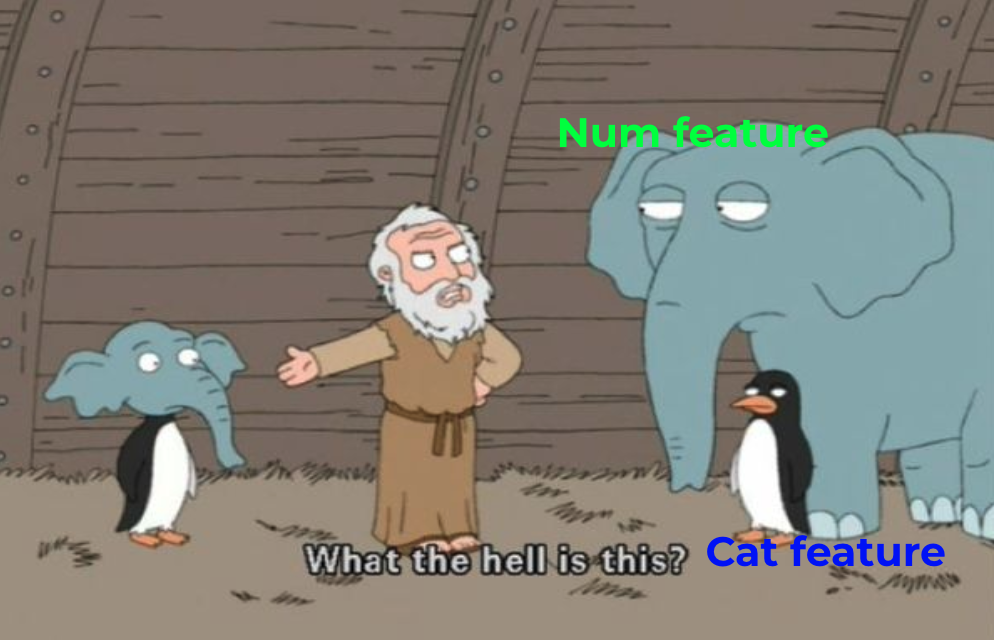
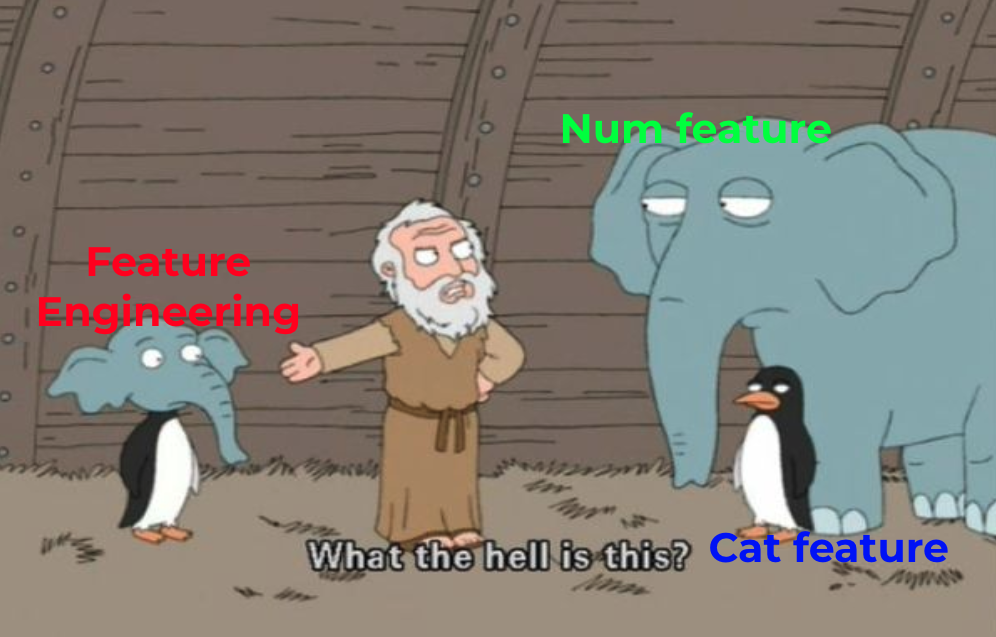

# 😎 Category-wise Numeric Aggregates

In [74]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,x_scaled,carat_mean_imputed,carat_with_clarity_mean,carat_with_clarity_cut_mean,carat_with_clarity_cut_mean_interaction_depth,carat_with_clarity_cut_mean_squared,carat_with_clarity_cut_mean_plus_depth,is_carat_low,carat_categories
0,0,1.52,Premium,F,VS2,0.350768,58.0,7.27,7.33,4.55,13619,1.401353,1.52,1.52,1.821380,0.638881,3.317427,2.172148,False,7.0
1,1,2.03,Very Good,J,SI2,0.165874,58.0,8.06,8.12,5.05,13387,2.113437,2.03,2.03,3.096034,0.513551,9.585428,3.261908,False,9.0
2,2,0.70,Ideal,G,VS1,-0.573702,57.0,5.69,5.73,3.50,2772,-0.022816,0.70,0.70,-0.228063,0.130840,0.052013,-0.801765,False,2.0
3,3,0.32,Ideal,G,VS1,-0.203914,56.0,4.38,4.41,2.71,666,-1.203614,0.32,0.32,-1.177805,0.240171,1.387225,-1.381719,True,0.0
4,4,1.70,Premium,G,VS2,0.720555,59.0,7.65,7.61,4.77,14453,1.743874,1.70,1.70,2.271258,1.636567,5.158614,2.991814,False,8.0


In [75]:
df.groupby("cut")["depth"].mean()

cut
Fair         2.266308
Good         0.918216
Ideal       -0.055663
Premium     -0.359285
Very Good    0.208339
Name: depth, dtype: float64

In [76]:
df["cutwise_depth_mean"] = df.groupby("cut")["depth"].transform("mean")

In [77]:
df[["cut", "depth", "cutwise_depth_mean"]].head(10)

,cut,depth,cutwise_depth_mean
0,Premium,0.350768,-0.359285
1,Very Good,0.165874,0.208339
2,Ideal,-0.573702,-0.055663
3,Ideal,-0.203914,-0.055663
4,Premium,0.720555,-0.359285
5,Very Good,0.905449,0.208339
6,Ideal,-0.019020,-0.055663
7,Premium,0.628108,-0.359285
8,Ideal,0.165874,-0.055663
9,Good,1.645025,0.918216


# ⚔️ Leathal Weapon Target Encoding

### Encodes some information about the target variable.
### Can be risky - very high chance of overfitting.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("../data/tab_playground.csv")
df = df.drop(columns=["id"])

train, test = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

for col in train.columns:
    if train[col].dtype == "O":
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])

y_train = train["price"]
x_train = train.drop(columns=["price"])

y_test = test["price"]
x_test = test.drop(columns=["price"])

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

score = mean_squared_error(y_test, model.predict(x_test), squared=False)
score

852.539235758877

In [79]:
cutwise_price_mean = train.groupby("cut")["price"].mean()
colorwise_price_mean = train.groupby("color")["price"].mean()
claritywise_price_mean = train.groupby("clarity")["price"].mean()

cutwise_price_mean

cut
0    4800.839657
1    4198.160868
2    3392.306907
3    4798.447592
4    4185.177151
Name: price, dtype: float64

In [80]:
train["cutwise_price_mean"] = train["cut"].map(cutwise_price_mean)
test["cutwise_price_mean"] = test["cut"].map(cutwise_price_mean)

train["colorwise_price_mean"] = train["color"].map(colorwise_price_mean)
test["colorwise_price_mean"] = test["color"].map(colorwise_price_mean)

train["claritywise_price_mean"] = train["clarity"].map(claritywise_price_mean)
test["claritywise_price_mean"] = test["clarity"].map(claritywise_price_mean)

In [81]:
y_train = train["price"]
x_train = train.drop(columns=["price"])

y_test = test["price"]
x_test = test.drop(columns=["price"])

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

score = mean_squared_error(y_test, model.predict(x_test), squared=False)
score

838.5838698982362

# 🤖 Using ML to Handle Null Values 😎

In [82]:
import numpy as np

df = pd.read_csv("../data/tab_playground.csv")

replace_percentage = 0.3
n_replace = int(df.shape[0] * replace_percentage)

nan_indices = np.random.choice(df.index, n_replace, replace=False)
df.loc[nan_indices, 'carat'] = np.nan

In [83]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = [col for col in df.columns if df[col].dtype == "O"]

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(
    ohe.fit_transform(df[cat_cols]).toarray(), 
    columns=list(itertools.chain(*ohe.categories_))
)

df = df.drop(columns=cat_cols)

df = pd.concat([df, ohe_df], axis=1)

In [84]:
df.head()

,id,carat,depth,table,x,y,z,price,Fair,Good,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,NaN,62.2,58.0,7.27,7.33,4.55,13619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
sampled_df = df.sample(500, random_state=42)

sampled_df.head()

,id,carat,depth,table,x,y,z,price,Fair,Good,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
14868,14868,NaN,62.1,57.0,5.05,5.08,3.14,1355,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
165613,165613,2.00,59.5,57.0,8.08,8.15,4.89,14691,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
96727,96727,0.27,60.5,59.0,4.19,4.16,2.52,844,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145593,145593,0.32,61.2,59.0,4.43,4.44,2.71,707,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
118689,118689,1.19,62.5,56.0,6.77,6.81,4.23,5797,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
%%time

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(
    imputer.fit_transform(sampled_df.drop(columns=["id"])),
    columns=sampled_df.columns[1:]
)

CPU times: user 47.3 ms, sys: 9.19 ms, total: 56.5 ms
Wall time: 12.6 ms


In [87]:
df_imputed["carat_og"] = sampled_df["carat"].values

df_imputed[df_imputed["carat_og"].isna()][["carat_og", "carat"]].head(10)

,carat_og,carat
0,NaN,0.552
8,NaN,0.828
19,NaN,0.322
22,NaN,1.110
37,NaN,0.320
41,NaN,1.054
42,NaN,0.552
44,NaN,0.474
46,NaN,0.338
54,NaN,1.070


# Also, checkout [XGBoost Imputer](https://github.com/antoinepay/xgbimputer) 🌟

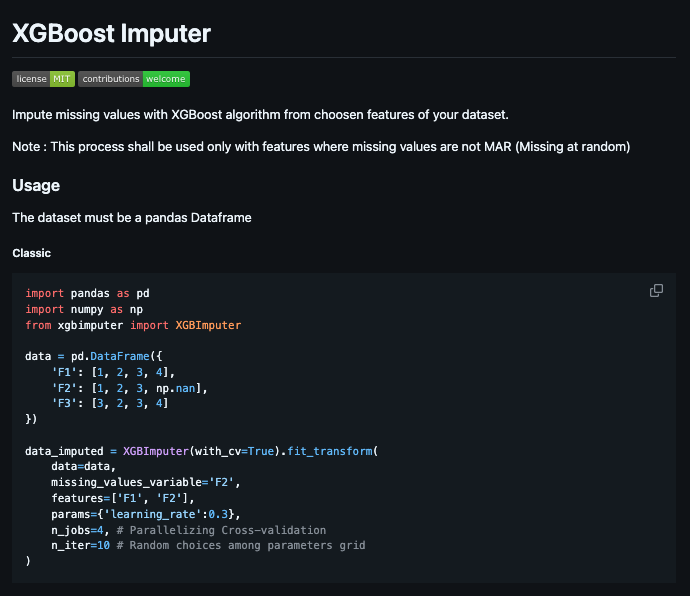

# 🕰️ **Handling Timestamps**

In [88]:
df = pd.read_parquet("../data/pog.parquet")

In [89]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


In [90]:
df["publishedAt"].unique().tolist()[: 10]

[Timestamp('2020-08-11 19:20:14+0000', tz='UTC'),
 Timestamp('2020-08-11 17:00:10+0000', tz='UTC'),
 Timestamp('2020-08-11 16:34:06+0000', tz='UTC'),
 Timestamp('2020-08-11 16:38:55+0000', tz='UTC'),
 Timestamp('2020-08-11 15:10:05+0000', tz='UTC'),
 Timestamp('2020-08-11 20:00:04+0000', tz='UTC'),
 Timestamp('2020-08-12 00:17:41+0000', tz='UTC'),
 Timestamp('2020-08-11 17:15:11+0000', tz='UTC'),
 Timestamp('2020-08-10 22:26:59+0000', tz='UTC'),
 Timestamp('2020-08-11 23:00:10+0000', tz='UTC')]

### 🪃 Basic Features

In [91]:
# Extracting different types of time-based features
df['year'] = df['publishedAt'].dt.year
df['month'] = df['publishedAt'].dt.month
df['day'] = df['publishedAt'].dt.day
df['dayofweek'] = df['publishedAt'].dt.dayofweek  # Monday=0, Sunday=6

df['hour'] = df['publishedAt'].dt.hour
df['minute'] = df['publishedAt'].dt.minute
df['second'] = df['publishedAt'].dt.second

In [92]:
df[['publishedAt', 'year', 'month', 'day', 'dayofweek', "hour", "minute", "second"]].sample(25, random_state=42)

,publishedAt,year,month,day,dayofweek,hour,minute,second
79524,2021-09-26 16:00:25+00:00,2021,9,26,6,16,0,25
42630,2021-03-16 15:00:14+00:00,2021,3,16,1,15,0,14
27463,2020-12-27 02:00:10+00:00,2020,12,27,6,2,0,10
7748,2020-09-14 17:05:40+00:00,2020,9,14,0,17,5,40
27137,2020-12-21 03:57:11+00:00,2020,12,21,0,3,57,11
75557,2021-09-03 22:00:11+00:00,2021,9,3,4,22,0,11
31916,2021-01-16 13:00:03+00:00,2021,1,16,5,13,0,3
9163,2020-09-21 16:14:36+00:00,2020,9,21,0,16,14,36
54503,2021-05-11 12:30:04+00:00,2021,5,11,1,12,30,4
14607,2020-10-22 19:00:14+00:00,2020,10,22,3,19,0,14


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 🤪 Extra Features

In [93]:
df['dayofyear'] = df['publishedAt'].dt.dayofyear
df['quarter'] = df['publishedAt'].dt.quarter
df['weekofyear'] = df['publishedAt'].dt.isocalendar().week  # ISO week
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)  # 1 if Sat/Sun, else 0
df['is_month_start'] = df['publishedAt'].dt.is_month_start.astype(int)
df['is_month_end'] = df['publishedAt'].dt.is_month_end.astype(int)
df['is_quarter_start'] = df['publishedAt'].dt.is_quarter_start.astype(int)
df['is_quarter_end'] = df['publishedAt'].dt.is_quarter_end.astype(int)
df['is_year_start'] = df['publishedAt'].dt.is_year_start.astype(int)
df['is_year_end'] = df['publishedAt'].dt.is_year_end.astype(int)

In [94]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'id', 'duration_seconds',
       'has_thumbnail', 'target', 'year', 'month', 'day', 'dayofweek', 'hour',
       'minute', 'second', 'dayofyear', 'quarter', 'weekofyear', 'is_weekend',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end'],
      dtype='object')

In [95]:
df[['publishedAt', 'dayofyear', 'quarter', 'weekofyear', 'hour', 'minute', 'second',
       'is_weekend', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end']].sample(25, random_state=42)

,publishedAt,dayofyear,quarter,weekofyear,hour,minute,second,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
79524,2021-09-26 16:00:25+00:00,269,3,38,16,0,25,1,0,0,0,0,0,0
42630,2021-03-16 15:00:14+00:00,75,1,11,15,0,14,0,0,0,0,0,0,0
27463,2020-12-27 02:00:10+00:00,362,4,52,2,0,10,1,0,0,0,0,0,0
7748,2020-09-14 17:05:40+00:00,258,3,38,17,5,40,0,0,0,0,0,0,0
27137,2020-12-21 03:57:11+00:00,356,4,52,3,57,11,0,0,0,0,0,0,0
75557,2021-09-03 22:00:11+00:00,246,3,35,22,0,11,0,0,0,0,0,0,0
31916,2021-01-16 13:00:03+00:00,16,1,2,13,0,3,1,0,0,0,0,0,0
9163,2020-09-21 16:14:36+00:00,265,3,39,16,14,36,0,0,0,0,0,0,0
54503,2021-05-11 12:30:04+00:00,131,2,19,12,30,4,0,0,0,0,0,0,0
14607,2020-10-22 19:00:14+00:00,296,4,43,19,0,14,0,0,0,0,0,0,0


In [96]:
# Cyclic features (better for ML models)
df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)
df['sin_dayofweek'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['cos_dayofweek'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

In [97]:
df[["publishedAt", 'sin_hour', 'cos_hour', 'sin_dayofweek', 'cos_dayofweek', 'sin_month', 'cos_month']].sample(25, random_state=42)

,publishedAt,sin_hour,cos_hour,sin_dayofweek,cos_dayofweek,sin_month,cos_month
79524,2021-09-26 16:00:25+00:00,-8.660254e-01,-0.500000,-0.781831,0.623490,-1.000000e+00,-1.836970e-16
42630,2021-03-16 15:00:14+00:00,-7.071068e-01,-0.707107,0.781831,0.623490,1.000000e+00,6.123234e-17
27463,2020-12-27 02:00:10+00:00,5.000000e-01,0.866025,-0.781831,0.623490,-2.449294e-16,1.000000e+00
7748,2020-09-14 17:05:40+00:00,-9.659258e-01,-0.258819,0.000000,1.000000,-1.000000e+00,-1.836970e-16
27137,2020-12-21 03:57:11+00:00,7.071068e-01,0.707107,0.000000,1.000000,-2.449294e-16,1.000000e+00
75557,2021-09-03 22:00:11+00:00,-5.000000e-01,0.866025,-0.433884,-0.900969,-1.000000e+00,-1.836970e-16
31916,2021-01-16 13:00:03+00:00,-2.588190e-01,-0.965926,-0.974928,-0.222521,5.000000e-01,8.660254e-01
9163,2020-09-21 16:14:36+00:00,-8.660254e-01,-0.500000,0.000000,1.000000,-1.000000e+00,-1.836970e-16
54503,2021-05-11 12:30:04+00:00,1.224647e-16,-1.000000,0.781831,0.623490,5.000000e-01,-8.660254e-01
14607,2020-10-22 19:00:14+00:00,-9.659258e-01,0.258819,0.433884,-0.900969,-8.660254e-01,5.000000e-01


In [98]:
df[["month", "sin_month", "cos_month"]].sample(25, random_state=42)

,month,sin_month,cos_month
79524,9,-1.000000e+00,-1.836970e-16
42630,3,1.000000e+00,6.123234e-17
27463,12,-2.449294e-16,1.000000e+00
7748,9,-1.000000e+00,-1.836970e-16
27137,12,-2.449294e-16,1.000000e+00
75557,9,-1.000000e+00,-1.836970e-16
31916,1,5.000000e-01,8.660254e-01
9163,9,-1.000000e+00,-1.836970e-16
54503,5,5.000000e-01,-8.660254e-01
14607,10,-8.660254e-01,5.000000e-01


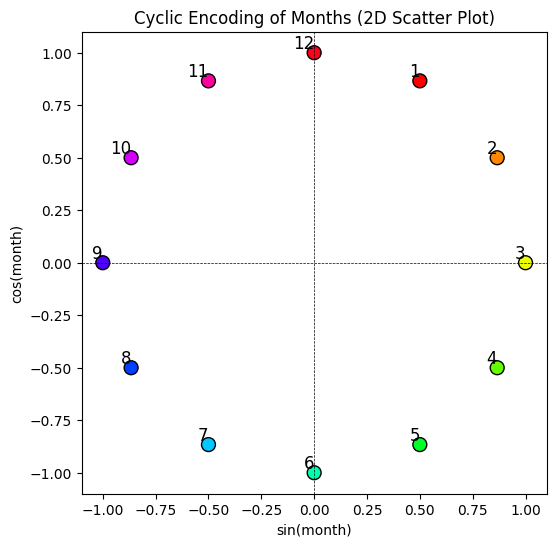

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Generate months (1 to 12)
months = np.arange(1, 13)

# Compute cyclic features
sin_month = np.sin(2 * np.pi * months / 12)
cos_month = np.cos(2 * np.pi * months / 12)

# Create a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(sin_month, cos_month, c=months, cmap="hsv", edgecolors='black', s=100)

# Annotate each point with the corresponding month
for i, month in enumerate(months):
    plt.text(sin_month[i], cos_month[i], str(month), fontsize=12, ha='right', va='bottom')

# Labels and title
plt.xlabel("sin(month)")
plt.ylabel("cos(month)")
plt.title("Cyclic Encoding of Months (2D Scatter Plot)")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")

# Show plot
plt.show()
